In [ ]:
#Excersise 3 Chapter 8
# Consider the Gini index, classification error, and entropy in a
# simple classification setting with two classes. Create a single plot
# that displays each of these quantities as a function of ˆpm1. The xaxis
# should display ˆpm1, ranging from 0 to 1, and the y-axis should
# display the value of the Gini index, classification error, and entropy.
# Hint: In a setting with two classes, ˆpm1 = 1− ˆpm2. You could make
# this plot by hand, but it will be much easier to make in R.

In [ ]:
#dont know how to do it :(

In [ ]:
# Suppose we produce ten bootstrapped samples from a data set
# containing red and green classes. We then apply a classification tree
# to each bootstrapped sample and, for a specific value of X, produce
# 10 estimates of P(Class is Red|X):
# 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
# There are two common ways to combine these results together into a
# single class prediction. One is the majority vote approach discussed in
# this chapter. The second approach is to classify based on the average
# probability. In this example, what is the final classification under each
# of these two approaches?

In [ ]:
#Majority vote: 
p= c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
p<= 0.5
p>= 0.5
#the number of Trues on p<0.5 is 4 and p>0.5 is 6, therefore X is classified as RED


In [ ]:
#Average probability
mean(p)
#he mean of the probabilities is 0.45, therefore X is Clasified as GREEN

In [ ]:
#Ex 7
# In the lab, we applied random forests to the Boston data using mtry=6
# and using ntree=25 and ntree=500. Create a plot displaying the test
# error resulting from random forests on this data set for a more comprehensive
# range of values for mtry and ntree. You can model your
# plot after Figure 8.10. Describe the results obtained.

In [1]:
library(MASS)
library(randomForest)
data(Boston)

smp_size <- floor(0.70 * nrow(Boston))
set.seed(123)
train_ind <- sample(seq_len(nrow(Boston)), size = smp_size)
X.train <- Boston[train_ind,-14 ]
X.test <- Boston[-train_ind,-14 ]
Y.train <- Boston[train_ind,14 ]
Y.test <- Boston[-train_ind,14 ] 

#https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [4]:
rf1 = randomForest(X.train, Y.train, X.test, Y.test, mtry = 3, ntree = 750)
rf2 = randomForest(X.train, Y.train, X.test, Y.test, mtry = 5, ntree = 750)
rf3 = randomForest(X.train, Y.train, X.test, Y.test, mtry = 10, ntree = 750)



ERROR: Error in legend(legend = c("3", "5", "10")): argument "x" is missing, with no default


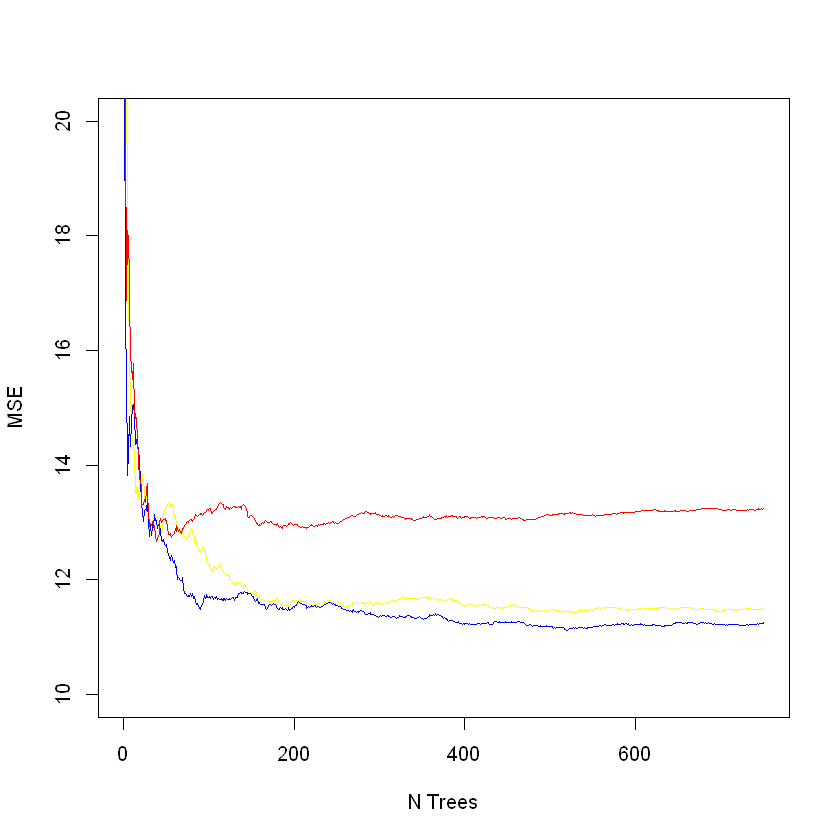

In [14]:
plot(1:750, rf1$test$mse, col = "yellow", type = "l", xlab = "N Trees", 
    ylab = "MSE", ylim = c(10, 20))
lines(1:750, rf2$test$mse, col = "blue", type = "l")
lines(1:750, rf3$test$mse, col = "red", type = "l")
legend(legend=c("3","5","10"))
#the MSE is high while using few trees, and it suddenly drops after using more or less 80 trees
# with a mtry value of 3 and 5 we got a lower MSE

In [ ]:
#EX 9 
# This problem involves the OJ data set which is part of the ISLR
# package.
# (a) Create a training set containing a random sample of 800 observations,
# and a test set containing the remaining observations.

In [17]:
library(ISLR)
attach(OJ)
set.seed(1013)
train_ind <- sample(seq_len(nrow(OJ)), size = 800)
X.train <- OJ[train_ind,]
X.test <- OJ[-train_ind,]

The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase


The following objects are masked from OJ (pos = 4):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase




In [19]:
# (b) Fit a tree to the training data, with Purchase as the response
# and the other variables as predictors. Use the summary() function
# to produce summary statistics about the tree, and describe the
# results obtained. What is the trainin
library(tree)
OJ_tree = tree(Purchase ~ ., data = X.train)
summary(OJ_tree)
# the tree uses 4 variablesm and has a error rate of 0.1612, and has 7 terminal nodes


Classification tree:
tree(formula = Purchase ~ ., data = X.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "SalePriceMM"  
Number of terminal nodes:  7 
Residual mean deviance:  0.7564 = 599.8 / 793 
Misclassification error rate: 0.1612 = 129 / 800 

In [20]:
# (c) Type in the name of the tree object in order to get a detailed
# text output. Pick one of the terminal nodes, and interpret the
# information displayed.
OJ_tree
#n25 ends in a branch, with a thereshold of salePrioceMM > 1.64 we have 57 
#observations on this split, and the final prefiction is CH

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1069.00 CH ( 0.61125 0.38875 )  
   2) LoyalCH < 0.5036 344  407.30 MM ( 0.27907 0.72093 )  
     4) LoyalCH < 0.276142 163  121.40 MM ( 0.12270 0.87730 ) *
     5) LoyalCH > 0.276142 181  246.30 MM ( 0.41989 0.58011 )  
      10) PriceDiff < 0.065 75   75.06 MM ( 0.20000 0.80000 ) *
      11) PriceDiff > 0.065 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 456  366.30 CH ( 0.86184 0.13816 )  
     6) LoyalCH < 0.753545 189  224.30 CH ( 0.71958 0.28042 )  
      12) ListPriceDiff < 0.235 79  109.40 MM ( 0.48101 0.51899 )  
        24) SalePriceMM < 1.64 22   20.86 MM ( 0.18182 0.81818 ) *
        25) SalePriceMM > 1.64 57   76.88 CH ( 0.59649 0.40351 ) *
      13) ListPriceDiff > 0.235 110   75.81 CH ( 0.89091 0.10909 ) *
     7) LoyalCH > 0.753545 267   85.31 CH ( 0.96255 0.03745 ) *

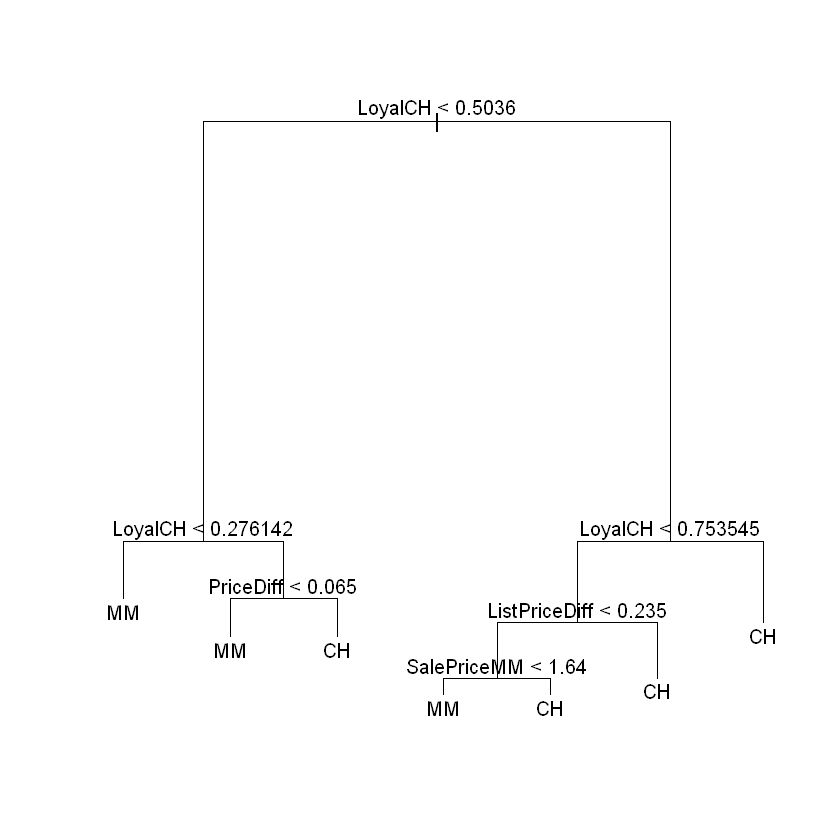

In [21]:
# (d) Create a plot of the tree, and interpret the results.
plot(OJ_tree)
text(OJ_tree, pretty = 0)
#LoyalCH is the most important feature, ig loyalCH <0.75 then the prediction is CH


In [23]:
# (e) Predict the response on the test data, and produce a confusion
# matrix comparing the test labels to the predicted test labels.
# What is the test error rate?
predtree = predict(OJ_tree, newdata = X.test, type = "class")
table(predtree,X.test$Purchase)
#the error rate is 0.166666

        
predtree  CH  MM
      CH 149  30
      MM  15  76

In [25]:
# (f) Apply the cv.tree() function to the training set in order to
# determine the optimal tree size.
cvtree = cv.tree(OJ_tree, FUN = prune.tree)
cvtree

$size
[1] 7 6 5 4 3 2 1

$dev
[1]  725.0241  715.2991  694.8085  759.0416  759.0416  762.3931 1072.7381

$k
[1]      -Inf  11.65858  26.66957  39.06970  39.73346  56.66284 295.48700

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

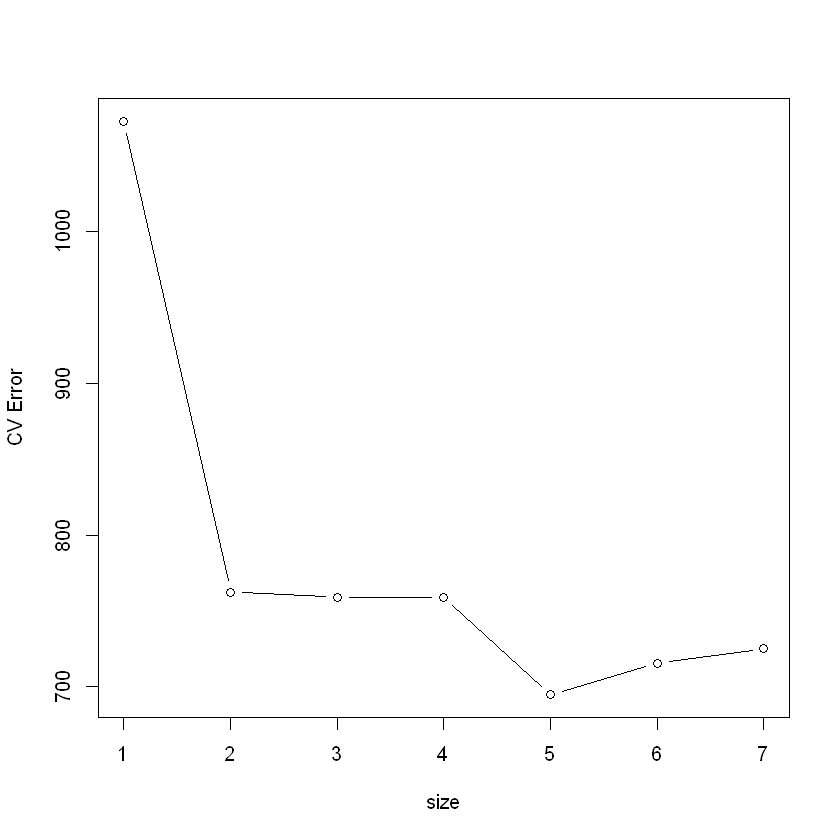

In [26]:
# (g) Produce a plot with tree size on the x-axis and cross-validated
# classification error rate on the y-axis.
plot(cvtree$size, cvtree$dev, xlab = "size", ylab = "CV Error", type = "b")

In [ ]:
# (h) Which tree size corresponds to the lowest cross-validated classification
# error rate?
The size of 5 has the lowerst error rate

In [28]:
# (i) Produce a pruned tree corresponding to the optimal tree size
# obtained using cross-validation. If cross-validation does not lead
# to selection of a pruned tree, then create a pruned tree with five
# terminal nodes.
pruned = prune.tree(OJ_tree, best = 5)
pruned

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1069.00 CH ( 0.61125 0.38875 )  
   2) LoyalCH < 0.5036 344  407.30 MM ( 0.27907 0.72093 )  
     4) LoyalCH < 0.276142 163  121.40 MM ( 0.12270 0.87730 ) *
     5) LoyalCH > 0.276142 181  246.30 MM ( 0.41989 0.58011 ) *
   3) LoyalCH > 0.5036 456  366.30 CH ( 0.86184 0.13816 )  
     6) LoyalCH < 0.753545 189  224.30 CH ( 0.71958 0.28042 )  
      12) ListPriceDiff < 0.235 79  109.40 MM ( 0.48101 0.51899 ) *
      13) ListPriceDiff > 0.235 110   75.81 CH ( 0.89091 0.10909 ) *
     7) LoyalCH > 0.753545 267   85.31 CH ( 0.96255 0.03745 ) *

In [29]:
# (j) Compare the training error rates between the pruned and unpruned
# trees. Which is higher?
summary(pruned)
#error is 0.195, which is higher


Classification tree:
snip.tree(tree = OJ_tree, nodes = c(12L, 5L))
Variables actually used in tree construction:
[1] "LoyalCH"       "ListPriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.8027 = 638.1 / 795 
Misclassification error rate: 0.195 = 156 / 800 

In [35]:
# Compare the test error rates between the pruned and unpruned
# trees. Which is higher?
prun = predict(OJ_tree, newdata = X.test, type = "class")
unprun = predict(pruned, newdata = X.test, type = "class")
table(prun,X.test$Purchase)
table(unprun,X.test$Purchase)
#unpruned has a higher error rate

    
prun  CH  MM
  CH 149  30
  MM  15  76

      
unprun  CH  MM
    CH 115  12
    MM  49  94

In [6]:
#ex10
# 10. We now use boosting to predict Salary in the Hitters data set.
# (a) Remove the observations for whom the salary information is
# unknown, and then log-transform the salaries.
library(ISLR)
library(tidyr)
Hitters = Hitters %>% drop_na(Salary)
sum(is.na(Hitters$Salary))
Hitters$Salary = log(Hitters$Salary) 

[1] 0

In [7]:
# (b) Create a training set consisting of the first 200 observations, and
# a test set consisting of the remaining observations.
sample = 1:200
train = Hitters[sample, ]
test = Hitters[-sample, ]

In [76]:
# (c) Perform boosting on the training set with 1,000 trees for a range
# of values of the shrinkage parameter . Produce a plot with
# different shrinkage values on the x-axis and the corresponding
# training set MSE on the y-axis.
library(gbm)
lambdax = seq(0.00,0.5,0.01)
train_mse = rep(NA,length(lambdax))
test_mse = rep(NA,length(lambdax))
set.seed(123)
for (i in 1:length(lambdax)){
    boost = gbm(Salary~., data=train,distribution = "gaussian", n.trees = 1000, shrinkage = lambdax[i])
    train.pred = predict(boost,newdata=train, n.trees = 1000)
    test.pred = predict(boost,newdata=test, n.trees = 1000)
    train_mse[i] = mean((train$Salary - train.pred)^2)
    test_mse[i] = mean((test$Salary - test.pred)^2)
    }
                       


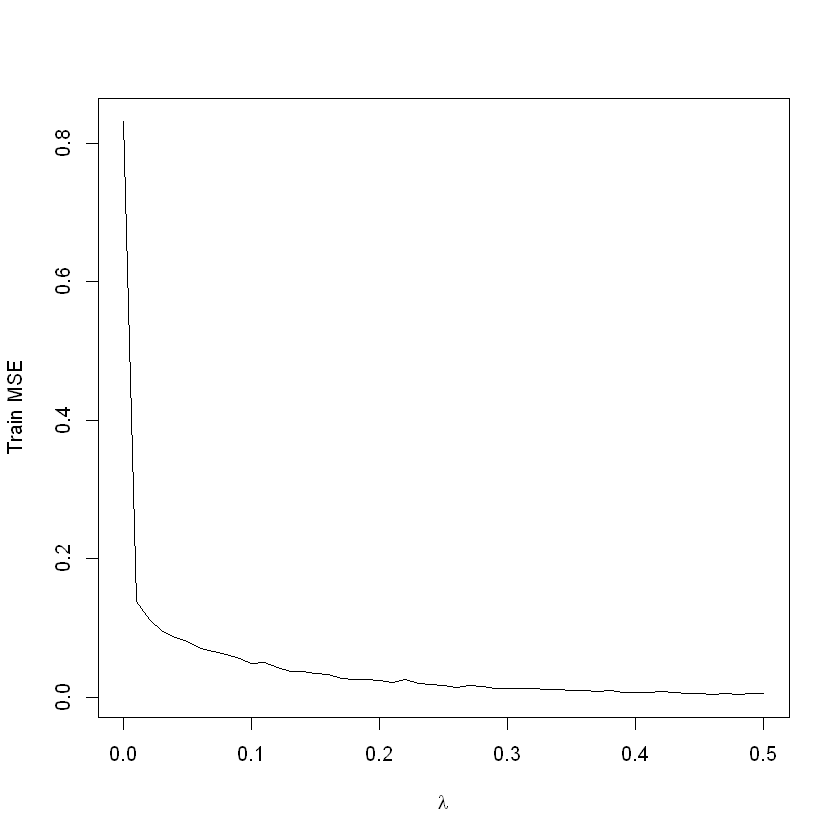

In [80]:

plot(lambdax,train_mse,type="l",xlab=expression(lambda), ylab="Train MSE")



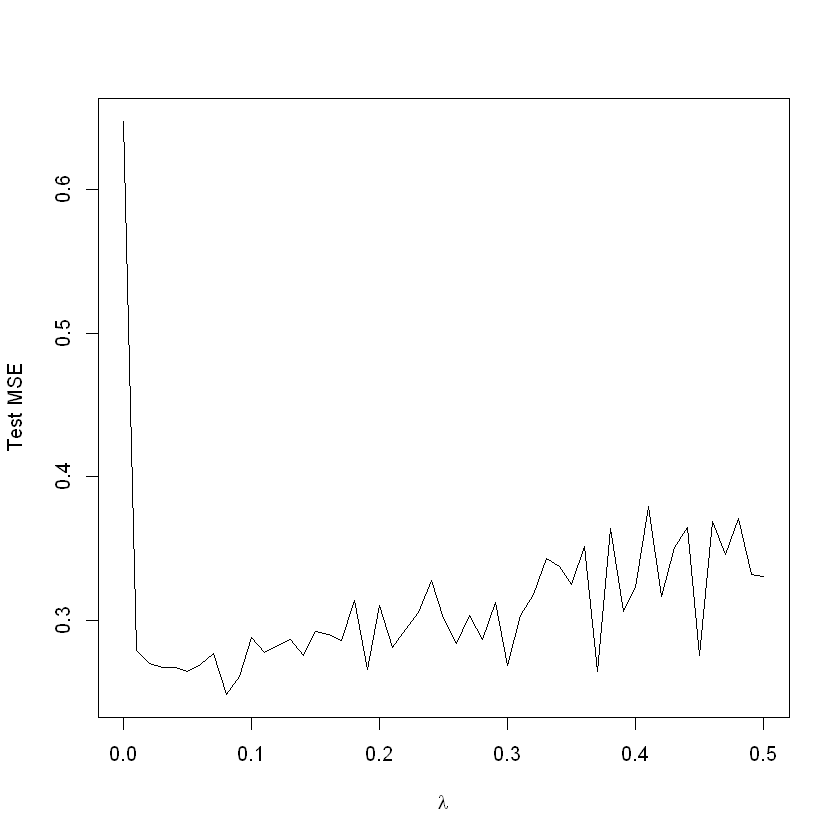

In [82]:
# (d) Produce a plot with different shrinkage values on the x-axis and
# the corresponding test set MSE on the y-axis.
plot(lambdax,test_mse,type="l",xlab=expression(lambda), ylab="Test MSE")

In [86]:
# (e) Compare the test MSE of boosting to the test MSE that results
# from applying two of the regression approaches seen in
# Chapters 3 and 6.
library(glmnet)
lm.fit = lm(Salary ~ ., data = train)
lm.pred = predict(lm.fit, test)
print(mean((test$Salary - lm.pred)^2))


[1] 0.4917959


In [91]:
lambdax[which.min(test_mse)]


[1] 0.08

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,23.3901467
CRuns,CRuns,9.3917942
PutOuts,PutOuts,7.4514393
Walks,Walks,6.9554526
CHits,CHits,6.2247155
CHmRun,CHmRun,5.9591513
Years,Years,5.5999805
CRBI,CRBI,5.2429122
Assists,Assists,4.4427258


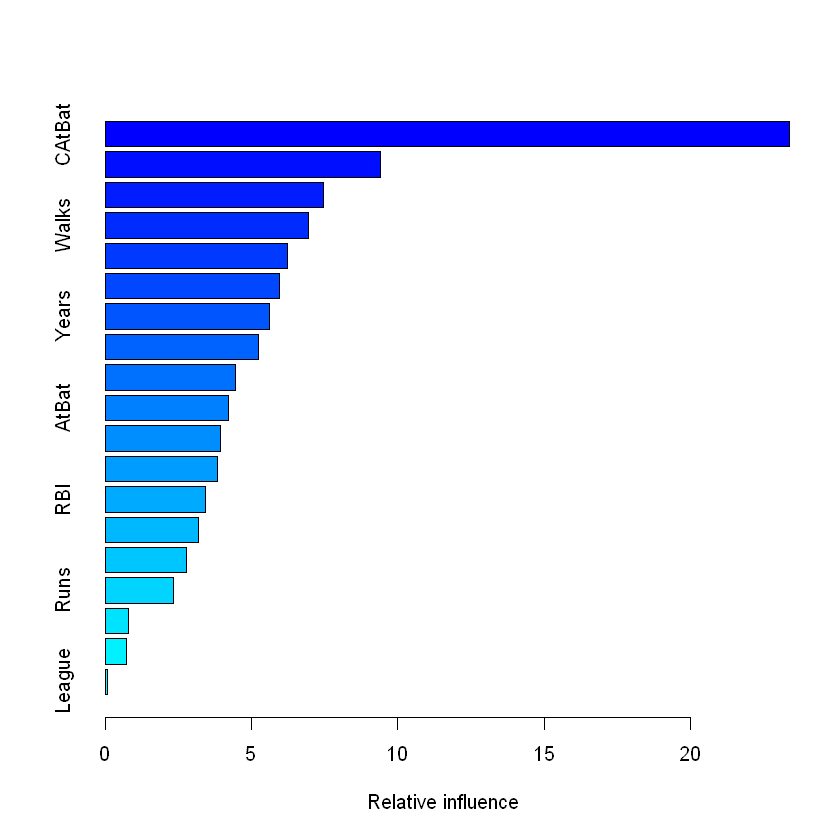

In [94]:
# (f) Which variables appear to be the most important predictors in
# the boosted model?
#CATBAT, CRUNS CWALK are the most important predictors

boost= gbm(Salary~., data=train, distribution = "gaussian", n.trees = 1000,  shrinkage = 0.08)
summary(boost)


In [101]:
# (g) Now apply bagging to the training set. What is the test set MSE
# for this approach?
#the MSE is lower than the  boosting
library(randomForest)
baggins = randomForest(Salary~.,train,mtry=19,importance=T)
baggins.pred = predict(baggins,newdata = test)
mean((test$Salary-baggins.pred)^2)

[1] 0.2274126

In [102]:
min(test_mse)

[1] 0.2480514